# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import warnings
warnings.simplefilter('ignore')
%pip install seaborn
%matplotlib inline
import matplotlib.pyplot as plt


import seaborn as sns


import pandas as pd
pd.set_option('display.max_columns', None)
import statistics as stats
from functools import reduce
import numpy as np
import scipy.stats as st
# Your Code Here

Note: you may need to restart the kernel to use updated packages.


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
# your code here
fitbit=pd.read_csv('../data/Fitbit2.csv')



#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [4]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


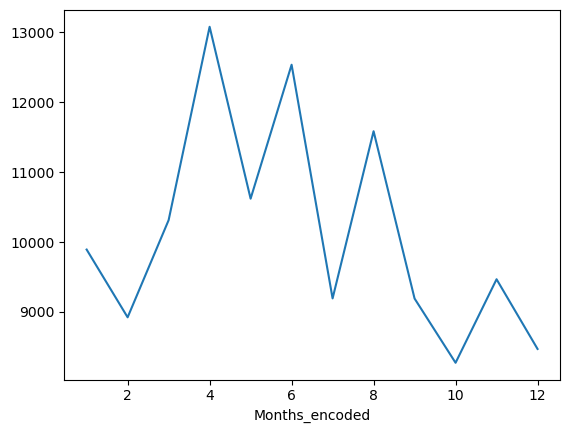

In [13]:
monthly_mean_steps = fitbit.groupby('Months_encoded')['Steps'].mean()
monthly_mean_steps.plot();

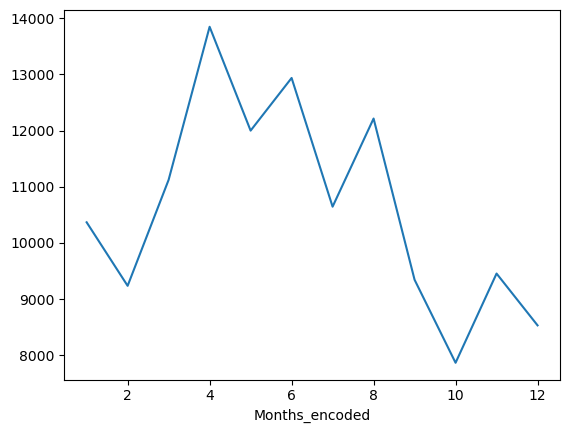

In [14]:
monthly_median_steps = fitbit.groupby('Months_encoded')['Steps'].median()
monthly_median_steps.plot();

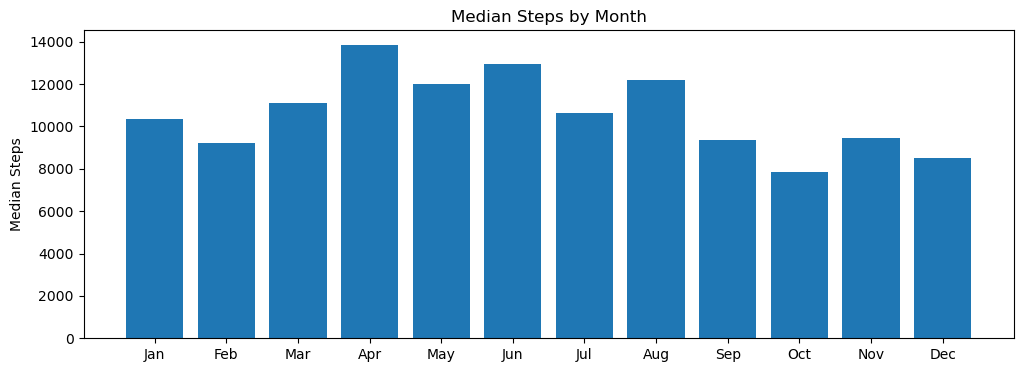

In [15]:
fig, ax = plt.subplots(figsize=(12,4))


ax.bar(monthly_median_steps.index, monthly_median_steps.values)

months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(monthly_median_steps.index)
ax.set_xticklabels(months_labels)


ax.set_ylabel('Median Steps')


ax.set_title('Median Steps by Month');

In [16]:

fig.savefig('monthly_median_steps.png')

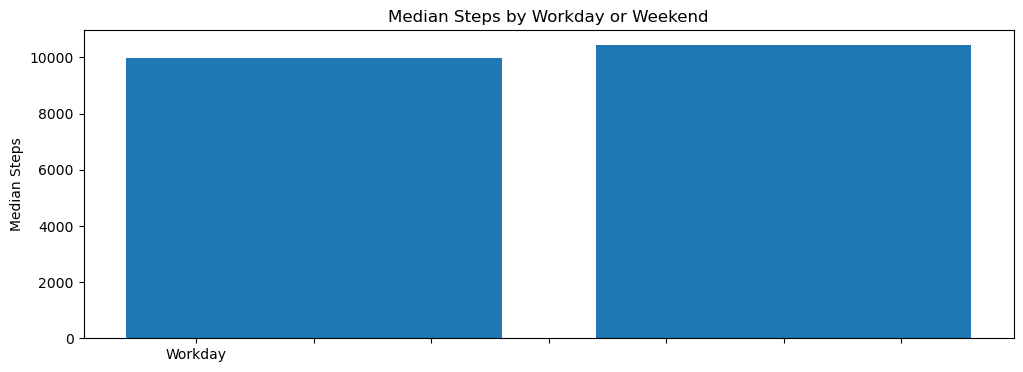

In [19]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here


by_workday = fitbit.groupby('Work_or_Weekend')['Steps'].median()


fig, ax = plt.subplots(figsize=(12,4))


ax.bar(by_workday.index, by_workday.values)


ax.set_xticklabels(['Weekend', 'Workday'])


ax.set_ylabel('Median Steps')


ax.set_title('Median Steps by Workday or Weekend');



fig.savefig('steps_workday_or_weekend.png')


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [20]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

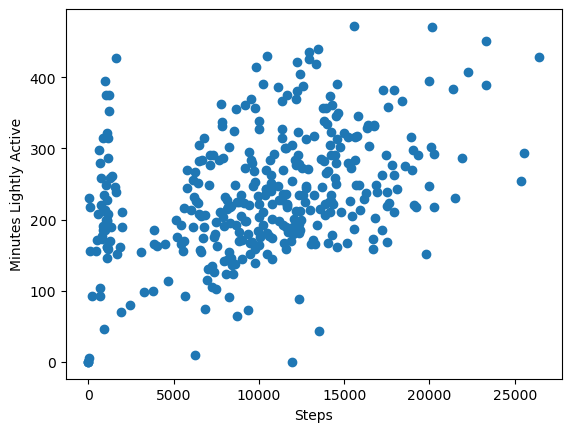

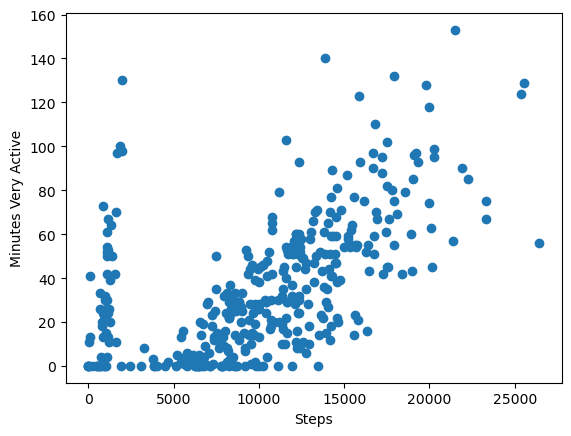

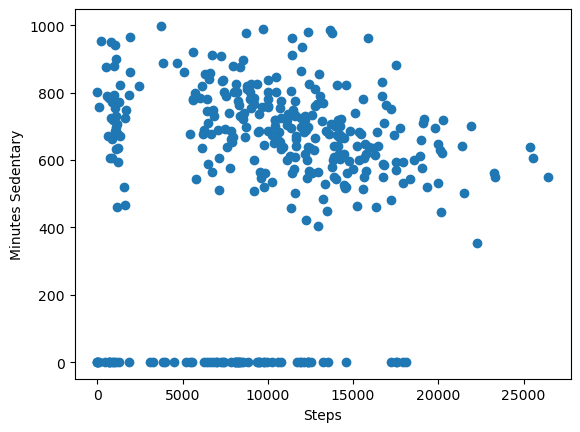

In [21]:
# your code here
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for feature in features:
    plt.scatter(fitbit['Steps'], fitbit[feature])
    plt.xlabel('Steps')
    plt.ylabel(feature)
    plt.show()



## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [22]:
# your code here

titanic=pd.read_csv('../data/titanic.csv')

titanic.columns=[e.lower().replace(' ', '_') for e in titanic.columns]


#### Explore the titanic dataset using Pandas dtypes.

In [23]:
titanic.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [24]:
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   gender       1309 non-null   object 
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1309 non-null   float64
 10  cabin        1309 non-null   object 
 11  embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [26]:
titanic.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.879186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,13.448335,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [27]:
# NUMERICAL VARIABLES


numerical_variables = titanic.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_variables


['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [28]:
# CATEGORICAL VARIABLES
categorical_variables = titanic.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_variables

['name', 'gender', 'ticket', 'cabin', 'embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

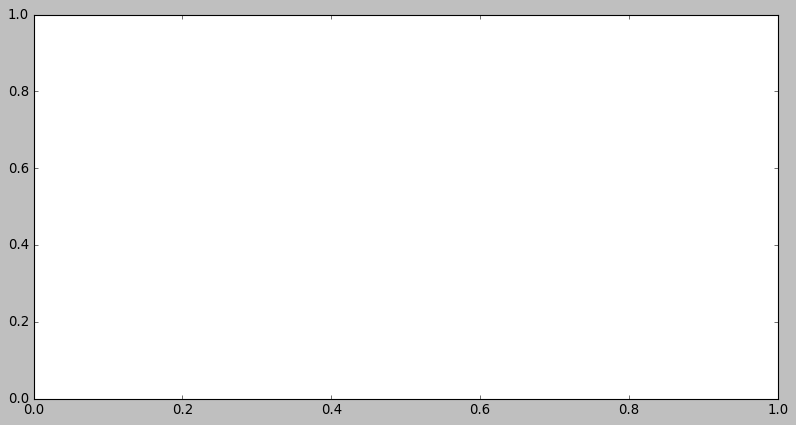

In [29]:
# your code here

plt.style.use('classic')


fig, ax = plt.subplots(figsize=(12, 6))


#### Use the right visulalization to show the distribution of column `Age`.

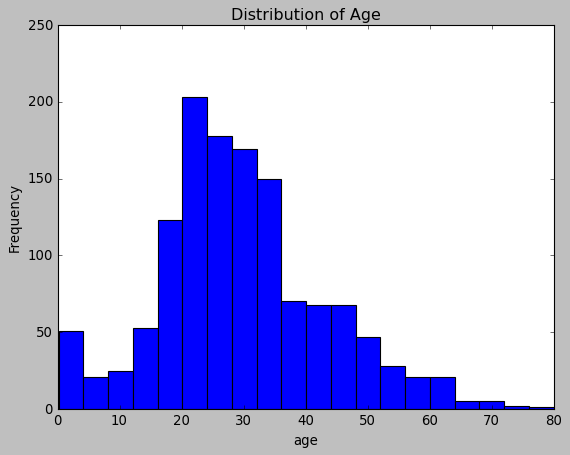

In [30]:

plt.hist(titanic['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

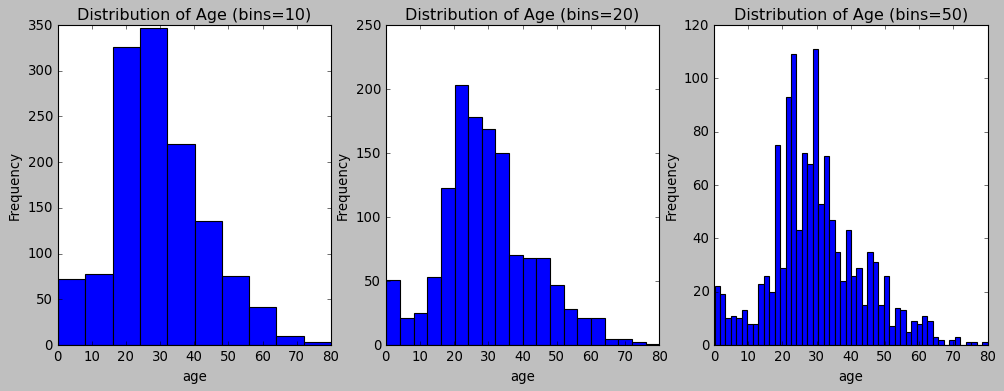

In [31]:

bins = [10, 20, 50]
fig, ax = plt.subplots(nrows=1, ncols=len(bins), figsize=(15, 5))

for i, bin_size in enumerate(bins):
    ax[i].hist(titanic['age'], bins=bin_size)
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f'Distribution of Age (bins={bin_size})')

plt.show()


#### How does the bin size affect your plot?

#### Use seaborn to show the distribution of column `Age`.

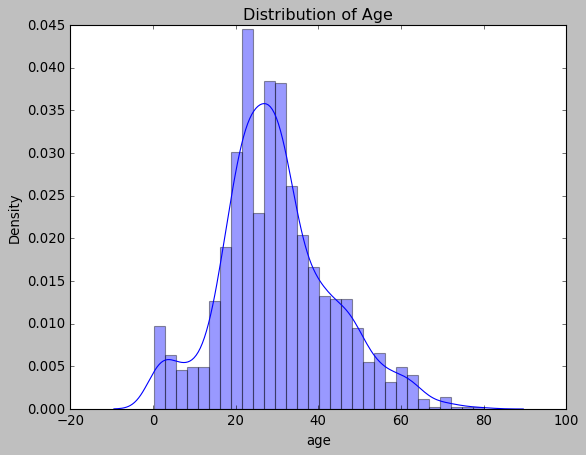

In [32]:
sns.distplot(titanic['age'])
plt.xlabel('age')
plt.title('Distribution of Age')
plt.show()


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

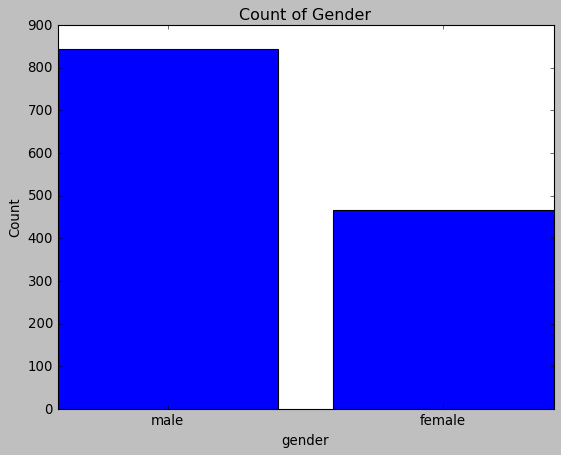

In [33]:

gender_counts = titanic['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()


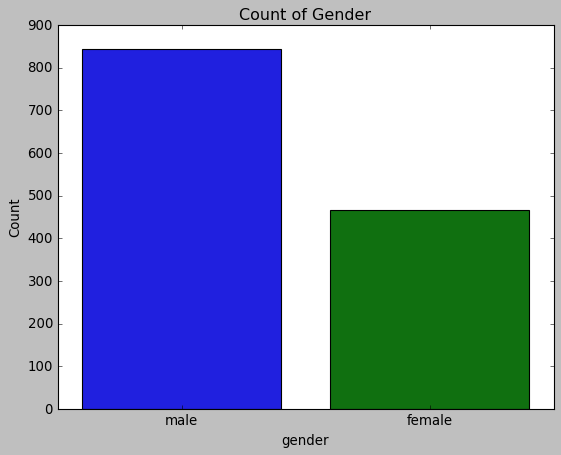

In [34]:

sns.countplot(data=titanic, x='gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()


#### Use the right plot to visualize the column `Pclass`.

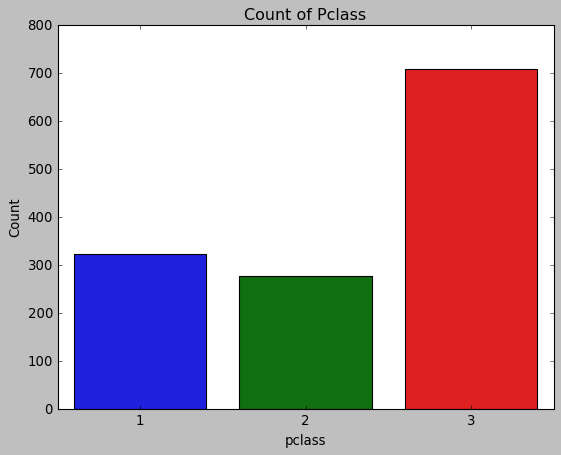

In [37]:

sns.countplot(data=titanic, x='pclass')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.title('Count of Pclass')
plt.show()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

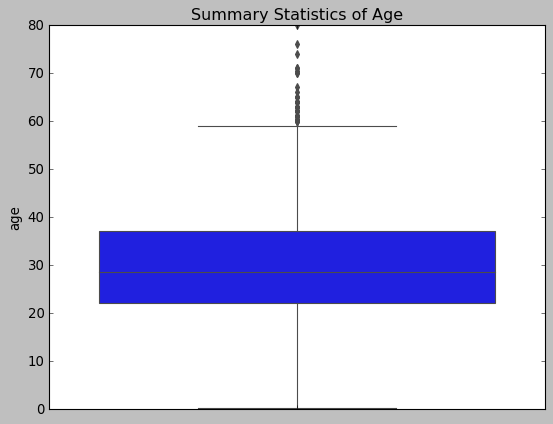

In [38]:

sns.boxplot(data=titanic, y='age', orient='v')
plt.title('Summary Statistics of Age')
plt.show()



#### What does the last plot tell you about the feature `Age`?

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

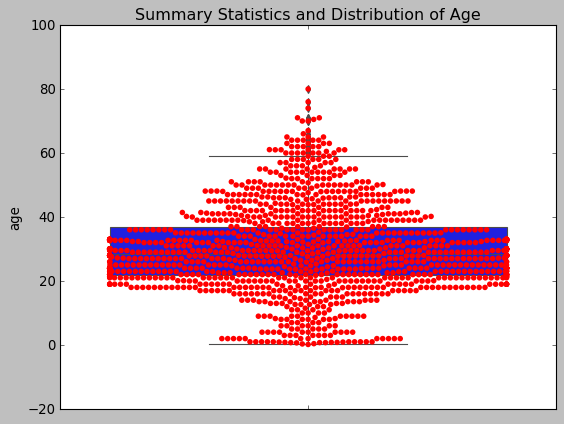

In [39]:
# your code here
sns.boxplot(data=titanic, y='age', color='blue')
sns.swarmplot(data=titanic, y='age', color='red')
plt.title('Summary Statistics and Distribution of Age')
plt.show()


#### What additional information does the last plot provide about feature `Age`?

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

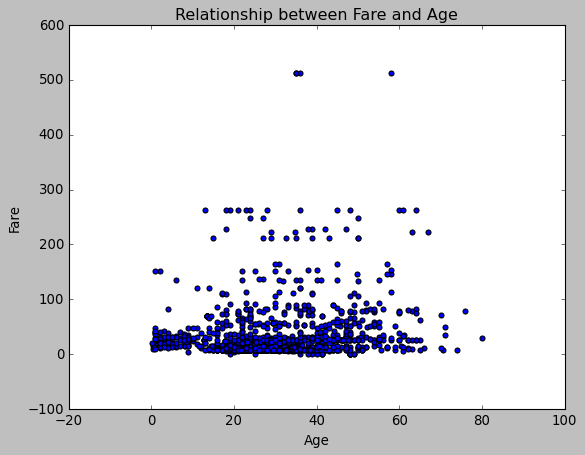

In [40]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['age'], titanic['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Fare and Age')
plt.show()


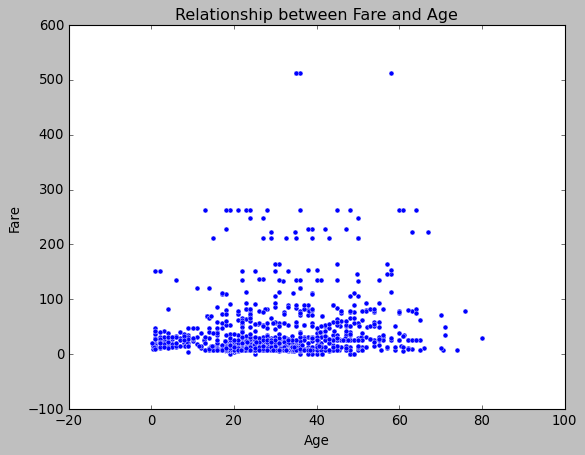

In [55]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x='age', y='fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Fare and Age')
plt.show()


#### Plot the correlation matrix using seaborn.

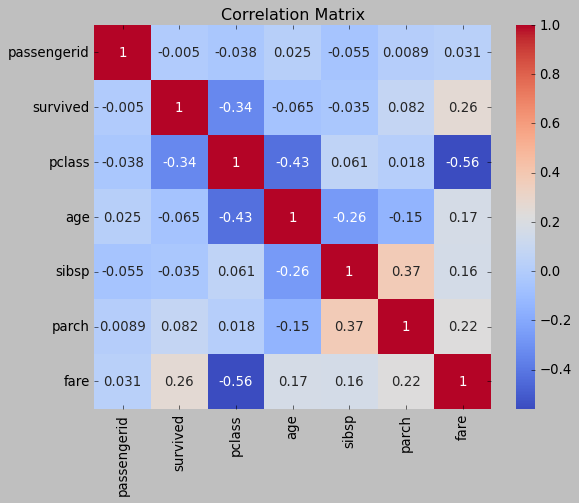

In [41]:
# your code here
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


#### What are the most correlated features?

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

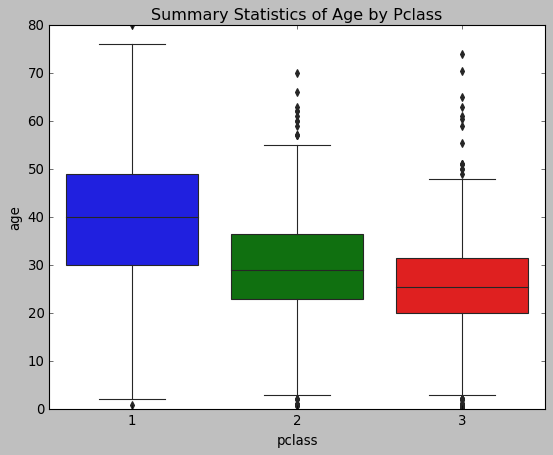

In [42]:

sns.boxplot(data=titanic, x='pclass', y='age')
plt.title('Summary Statistics of Age by Pclass')
plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

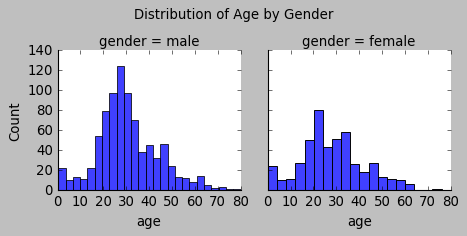

In [43]:

g = sns.FacetGrid(titanic, col='gender')
g.map(sns.histplot, 'age')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Age by Gender')
plt.show()
